# Logistic Regression for 2 features(updated)

Fixed the bug that caused the cost function to return NaN values for few iterations. 
Read: https://intellipaat.com/community/21066/cost-function-in-logistic-regression-gives-nan-as-a-result#:~:text=The%20accumulation%20of%20all%20of,will%20eventually%20lead%20to%20NaN.&text=Similarly%2C%20if%20y%20%3D%201%20for,x)and%20will%20produce%20NaN.
Decreased alpha: 0.01>>>0.001
Increased Iteration: 10000>>>100000
Added PlotDecision Boundary


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
theta_final=np.zeros(3)
zero_hist=[]
J_hist=[]

In [2]:
def getData():
    data=pd.read_csv('C:/Users/Kartikeya/Desktop/machine_learning/ex2data.csv')
    X1=np.array([data['X1']])
    X2=np.array([data['X2']])
    X=np.array(data.iloc[:,0:2])
    y=np.array([data['y']])
    return [X1,X2,y]
#ideally X1 and X2 should be sent as one matrix of X
#use data.iloc for this
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
#ideally data is to be loaded from CSV
#keeping it simple for now

In [3]:
def plotDataPoints(X1,X2,y):
    t=np.where(y==1)#returns array of indices
    f=np.where(y==0)
    plt.figure(figsize=(13,8))
    p1=plt.scatter(X1[t],X2[t])#using feature to plot only data points corresponding to y==1
    p2=plt.scatter(X1[f],X2[f],color='r',marker='x')#y==0
    plt.grid(True)
    plt.legend((p1,p2),("Selected","Not Selected"))
    plt.xlabel("Score of Semester 1")
    plt.ylabel("Score of Semester 2")
    plt.title("Students selected for interview")

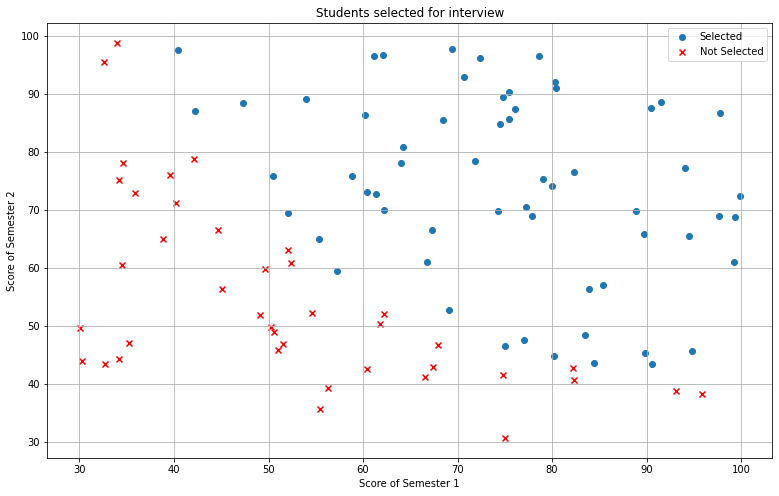

In [4]:
[X1,X2,y]=getData()
plotDataPoints(X1,X2,y)


In [5]:
def plotDecisionBoundary(X1,X2,y,theta):
    
    plotDataPoints(X1,X2,y)
    
    slope=theta[1]/theta[2]*(-1)
    intercept=theta[0]/theta[2]*(-1)
    xaxis=np.array([np.amin(X1),np.amax(X1)])
    yaxis=(slope*xaxis+intercept)
    plt.plot(xaxis,yaxis,color='g')

In [6]:
def costFunction(X1,X2,y,theta):
    m=X1.size
    hx=sigmoid(X1,X2,theta) #this is to calculate cost of the function 
    J=np.sum((-1)*y*np.log(hx)-(1-y)*np.log(1-hx))
    J=J/m
    J_hist.append(J)
    #---------------------------------------------
    X0=np.ones((1,m))# calculating gradient
    grad=np.array([np.sum(X0*(hx-y)),np.sum(X1*(hx-y)),np.sum(X2*(hx-y))])
    grad=grad/m
    return grad

In [7]:
def sigmoid(X1,X2,theta):
    hx=theta[0]+theta[1]*X1+theta[2]*X2
    hx=1/(1+np.exp(-hx))
    return hx.astype(float)

In [8]:
def updateTheta(theta,max_iter,alpha):
    for iter in range(max_iter):
        theta=theta-alpha*costFunction(X1,X2,y,theta)
    return theta

In [9]:
[X1,X2,y]=getData()
X1=np.array(X1)
X2=np.array(X2)

In [10]:
[X1,X2,y]

[array([[34.62, 30.29, 35.85, 60.18, 79.03, 45.08, 61.11, 75.02, 76.1 ,
         84.43, 95.86, 75.01, 82.31, 69.36, 39.54, 53.97, 69.07, 67.95,
         70.66, 76.98, 67.37, 89.68, 50.53, 34.21, 77.92, 62.27, 80.19,
         93.11, 61.83, 38.79, 61.38, 85.4 , 52.11, 52.05, 40.24, 54.64,
         33.92, 64.18, 74.79, 34.18, 83.9 , 51.55, 94.44, 82.37, 51.05,
         62.22, 77.19, 97.77, 62.07, 91.56, 79.94, 99.27, 90.55, 34.52,
         50.29, 49.59, 97.65, 32.58, 74.25, 71.8 , 75.4 , 35.29, 56.25,
         30.06, 44.67, 66.56, 40.46, 49.07, 80.28, 66.75, 32.72, 64.04,
         72.35, 60.46, 58.84, 99.83, 47.26, 50.46, 60.46, 82.23, 88.91,
         94.83, 67.32, 57.24, 80.37, 68.47, 42.08, 75.48, 78.64, 52.35,
         94.09, 90.45, 55.48, 74.49, 89.85, 83.49, 42.26, 99.32, 55.34,
         74.78]]),
 array([[78.02, 43.89, 72.9 , 86.31, 75.34, 56.32, 96.51, 46.55, 87.42,
         43.53, 38.23, 30.6 , 76.48, 97.72, 76.04, 89.21, 52.74, 46.68,
         92.93, 47.58, 42.84, 65.8 , 48.86, 4

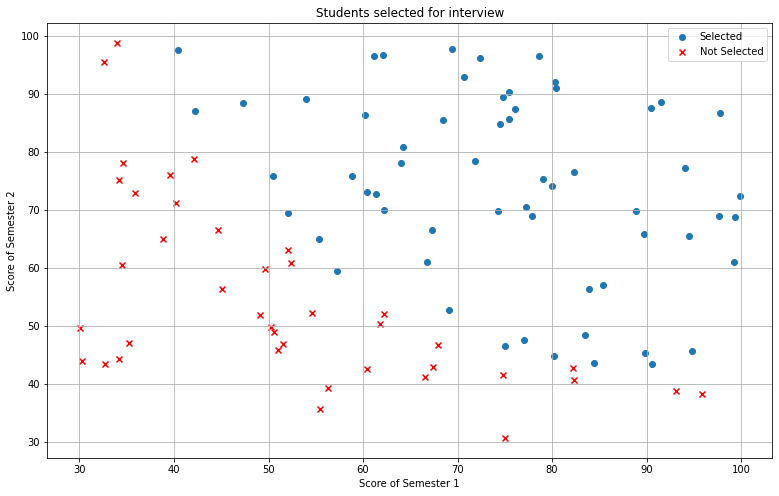

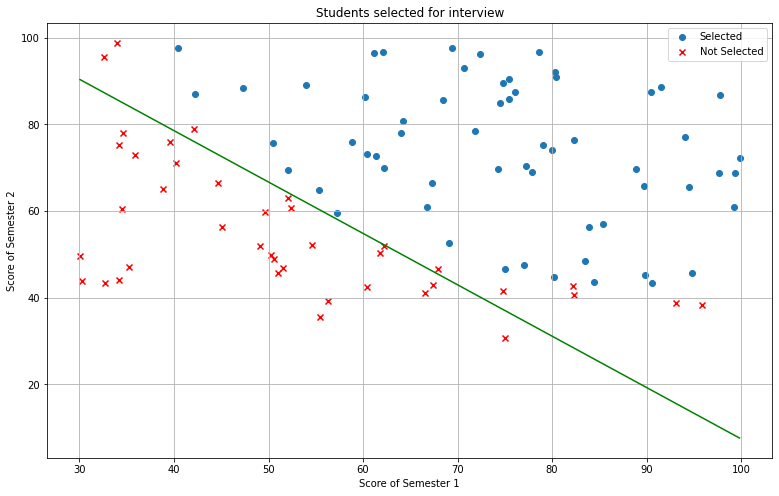

In [11]:
plotDataPoints(X1,X2,y)
theta=np.zeros(3)
max_iter=100000
alpha=0.001
theta_final=updateTheta(theta,max_iter,alpha)
plotDecisionBoundary(X1,X2,y,theta_final)

In [12]:
theta_final

array([-4.81168025,  0.04528132,  0.03818878])

this is an acceptable fit of the data for logistic regression. However, this algorithim is really slow because of use of manual function to minimise cost function, very high iterations and low learning rate is used.